In [1]:
import scanpy as sc
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import pertpy as pt
from bin import utils

ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

In [2]:
scdata = sc.read_h5ad("./RNA/sc.combined.clustered.h5")

In [3]:
distance = pt.tl.Distance("edistance", obsm_key="X_pca")
df = distance.pairwise(scdata, groupby='perturb_gene')

Output()

In [8]:
rawdata = sc.read_h5ad('./RNA/sc.combined.h5')

In [16]:
tf_data.obs["perturb_gene"].unique()

['sgBatf', 'Duplicate', 'sgBhlhe40', 'sgHopx', 'sgNon-targeting', ..., 'sgJund', 'sgJun', 'sgFos', 'sgTcf7', 'sgYbx1']
Length: 18
Categories (18, object): ['Duplicate', 'sgBatf', 'sgBcl2', 'sgBcl2l11', ..., 'sgTcf7', 'sgTgif1', 'sgTox', 'sgYbx1']

In [18]:
from scipy.stats import f_oneway

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/home/wpy/miniconda3

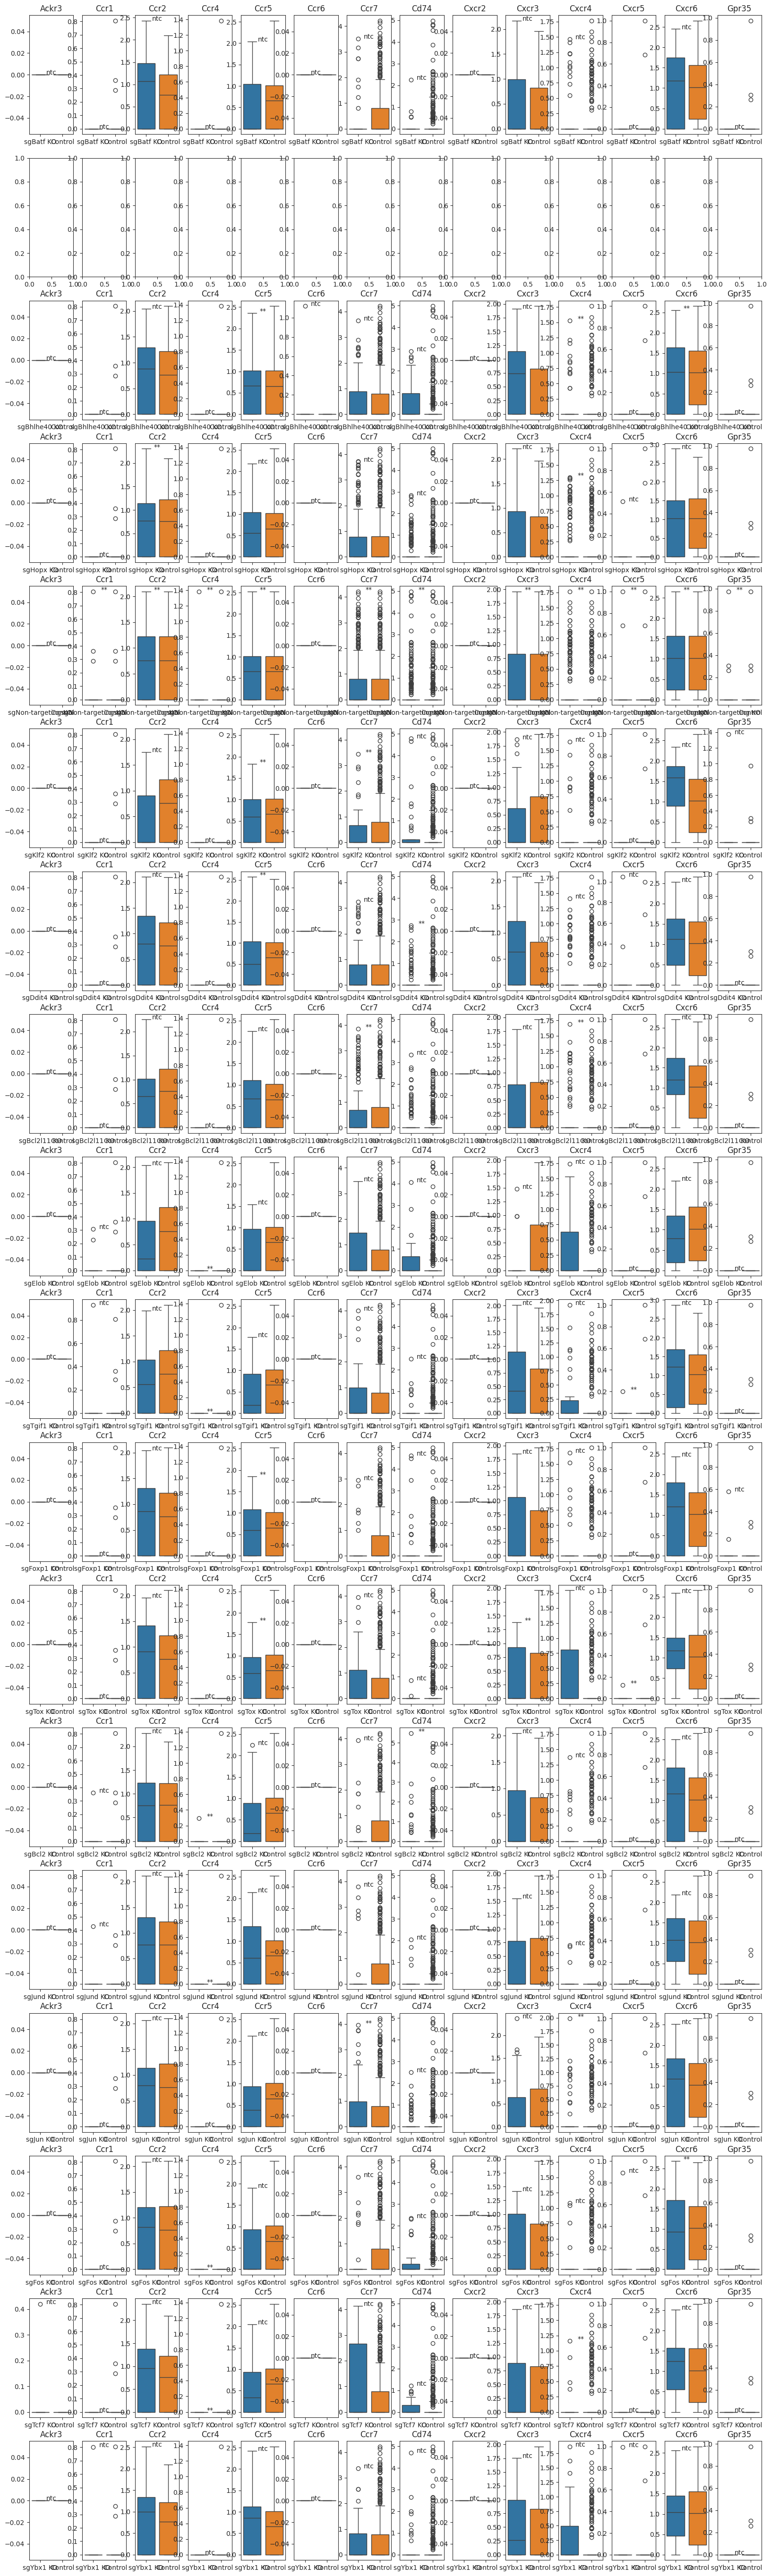

In [22]:
chemo_rec = ["sgCcr1", "sgCcr2", "sgCcr4", "sgCcr5", "sgCcr6", "sgCcr7",
    "sgCcr10", "sgCxcr1", "sgCxcr2", "sgCxcr3", "sgCxcr4", "sgAckr3",
    "sgCxcr5", "sgCxcr6", "sgCd74", "sgGpr35"]
chemo_name = [x.lstrip('sg') for x in chemo_rec]
inter_name = np.intersect1d(chemo_name, rawdata.var_names)
tf_data = rawdata[~np.isin(rawdata.obs["perturb_gene"], chemo_rec)][:, inter_name]

fig, axs = plt.subplots(18, 14, figsize=(20, 70))
for i, name in enumerate(inter_name):
    for j, guide in enumerate(tf_data.obs["perturb_gene"].unique()):
        if guide == "Duplicate": continue
        ax = axs[j, i]
        guide_vec = tf_data[tf_data.obs["perturb_gene"] == guide][:, name].X.toarray().flatten()
        ntc_vec = tf_data[tf_data.obs["perturb_gene"] == "sgNon-targeting"][:, name].X.toarray().flatten()
        sns.boxplot([guide_vec, ntc_vec], ax=ax)
        p = f_oneway(guide_vec, ntc_vec)[0]
        p = int(p * 100) * 0.01 if not np.isnan(p) else np.inf
        p = '**' if p < 0.1 else 'ntc'
        ax.text(0.5, max(guide_vec), p, ha='center')
        ax.set_xticks([0, 1])
        ax.set_xticklabels([f'{guide} KO', 'Control'])
        ax.set_title(f'{name}')

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


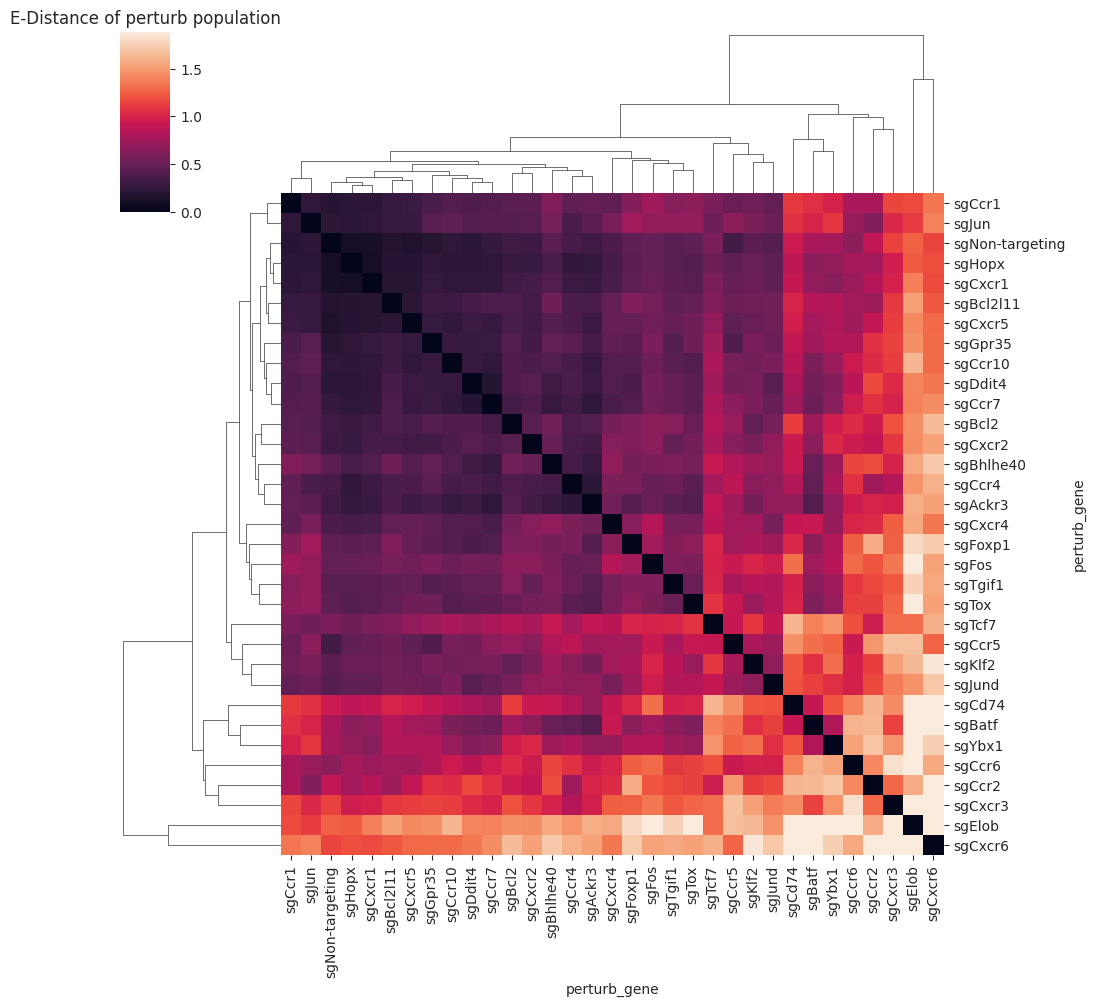

In [4]:
sns.clustermap(df, robust=True, figsize=(10, 10))
plt.title("E-Distance of perturb population")
plt.show()

In [5]:
distance = pt.tl.Distance("euclidean", obsm_key="X_pca")
df = distance.pairwise(scdata, groupby='perturb_gene')

Output()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


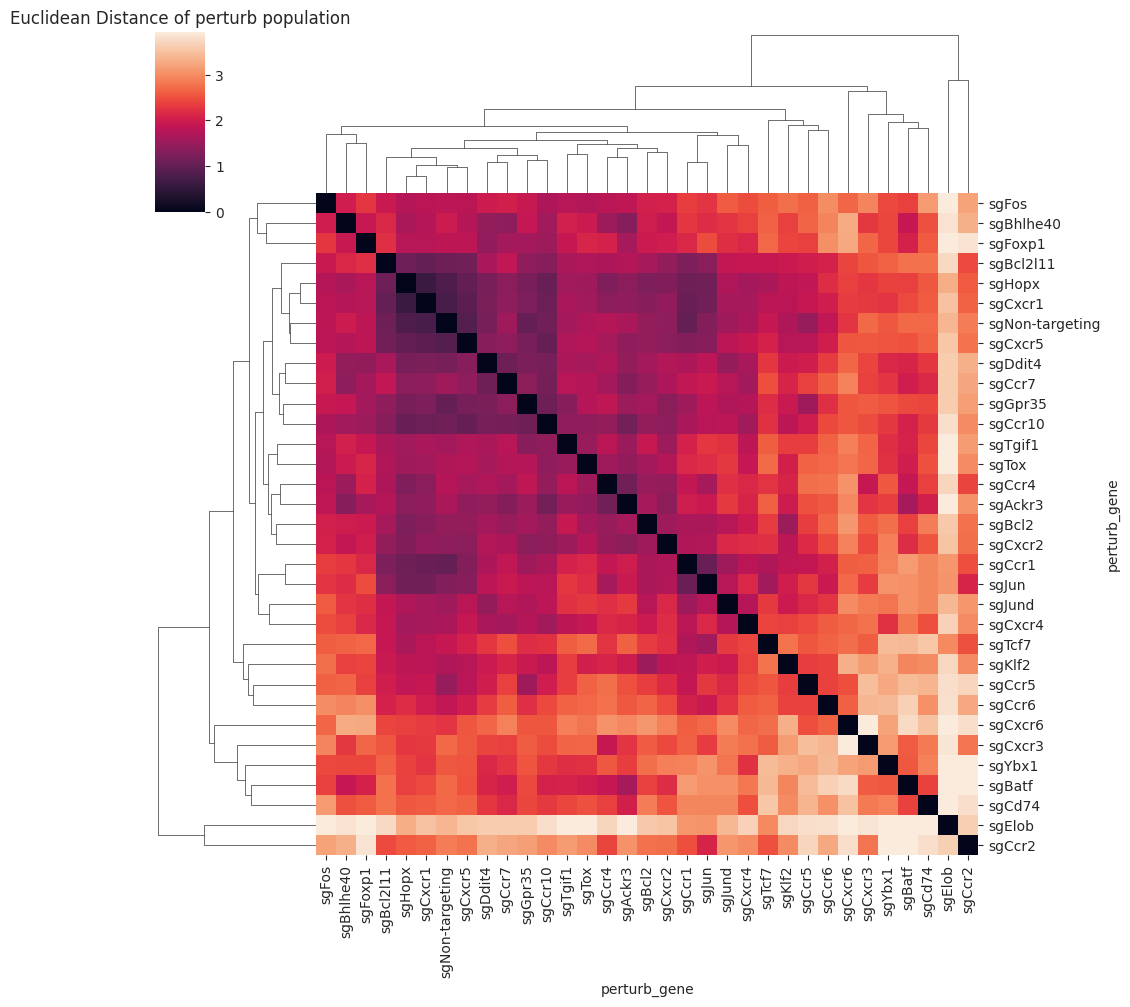

In [6]:
sns.clustermap(df, robust=True, figsize=(10, 10))
plt.title("Euclidean Distance of perturb population")
plt.show()

In [7]:
distance = pt.tl.Distance("mmd", obsm_key="X_pca")
df = distance.pairwise(scdata, groupby='perturb_gene')

Output()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


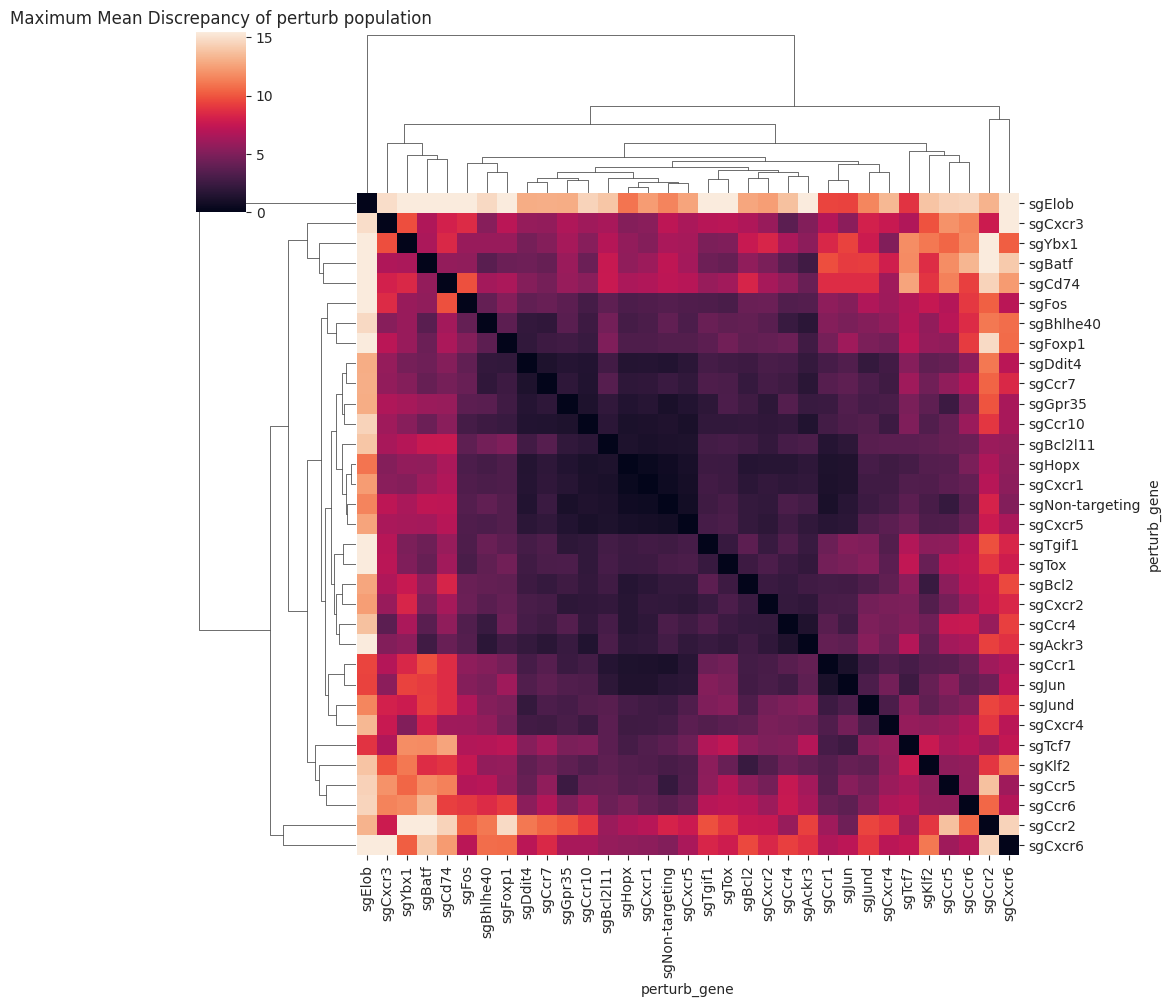

In [8]:
sns.clustermap(df, robust=True, figsize=(10, 10))
plt.title("Maximum Mean Discrepancy of perturb population")
plt.show()

# Cluster distance

In [9]:
distance = pt.tl.Distance("edistance", obsm_key="X_pca")
df = distance.pairwise(scdata, groupby='leiden')

Output()

/tmp/ipykernel_52161/3858378220.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(df, method="ward")


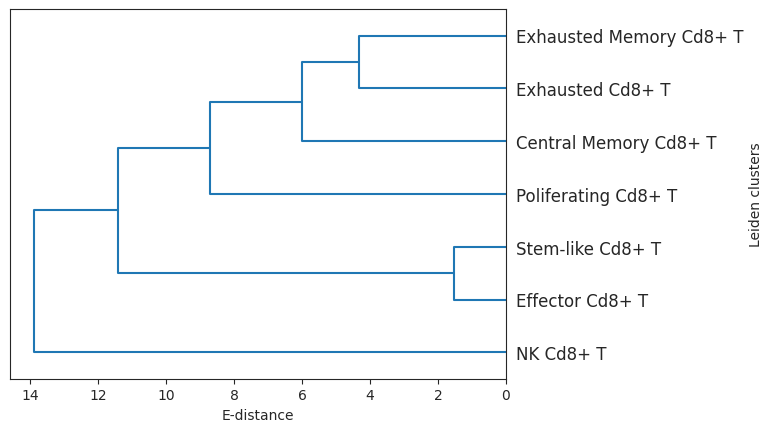

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df, method="ward")
hierarchy = dendrogram(Z, labels=df.index, orientation="left", color_threshold=0)
plt.xlabel("E-distance")
plt.ylabel("Leiden clusters")
plt.gca().yaxis.set_label_position("right")
plt.show()

/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/wpy/miniconda3/envs/scanpy/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


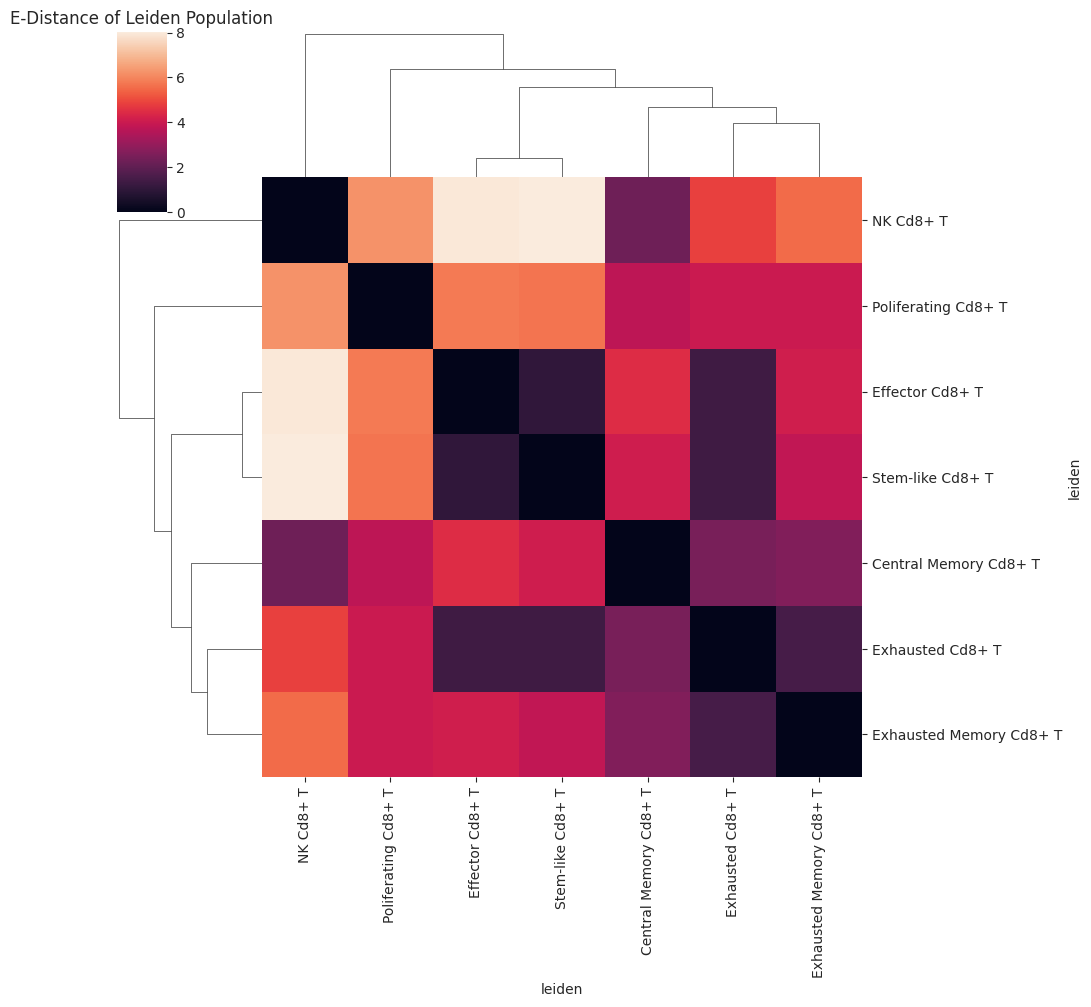

In [11]:
sns.clustermap(df, robust=True, figsize=(10, 10))
plt.title("E-Distance of Leiden Population")
plt.show()

In [12]:
etest = pt.tl.DistanceTest("edistance", n_perms=1000, obsm_key="X_pca", alpha=0.0015)
tab = etest(scdata, groupby="perturb_gene", contrast="sgNon-targeting")

Output()

/tmp/ipykernel_52161/721558183.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if tab.index[idx] != "sgNon-targeting": plt.text(tab["pvalue"][idx] + 0.01, tab["distance"][idx] + 0.01, tab.index[idx])


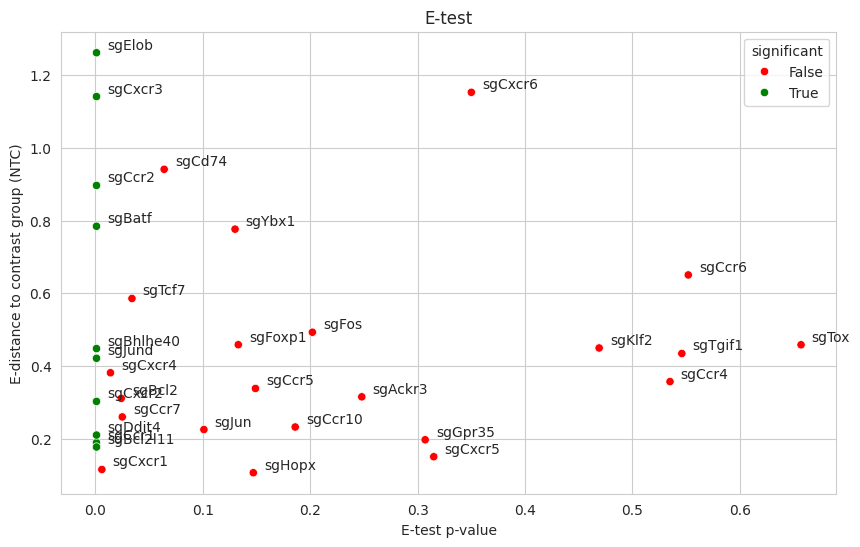

In [13]:
plt.figure(figsize=(10, 6))
with sns.axes_style("whitegrid"):
    sns.scatterplot(
        data=tab[tab.index != "sgNon-targeting"],
        x="pvalue",
        y="distance",
        hue="significant",
        palette={True: "green", False: "red"},
    )
for idx in range(len(tab.index)):
    if tab.index[idx] != "sgNon-targeting": plt.text(tab["pvalue"][idx] + 0.01, tab["distance"][idx] + 0.01, tab.index[idx])
plt.title("E-test")
plt.xlabel("E-test p-value")
plt.ylabel("E-distance to contrast group (NTC)")
plt.show()